# Ploteos tesis

## MFCC

In [2]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [3]:
frec=[500]
a = frec[0]

while max(frec)<20e3:
    a = a*2
    frec.append(a)
frec.pop()

fs=44100
n=10

t=np.linspace(0,1,fs)
signal=0
amp = [0]*len(frec)
amp[0] = 1/1 #500
amp[1] = 1/3 #1000
amp[2] = 1/4 #2000
amp[3] = 1/5 #4000
amp[4] = 1/6 #8000
amp[5] = 1/7 #16000

c=0
for f in frec:
    signal += amp[c]*np.sin(2*np.pi*f*t)
    c+=1


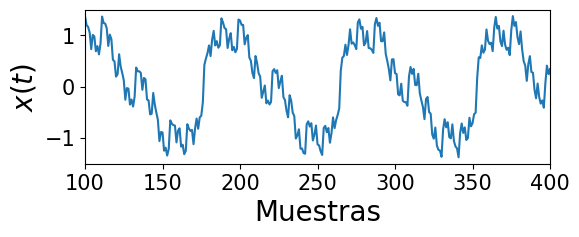

In [4]:
plt.figure(figsize=(6, 2))
plt.xlim(100,400)
plt.ylim(-1.5,1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Muestras',fontsize=20)
plt.ylabel('$x(t)$',fontsize=20)
plt.plot(signal)
plt.show()

In [5]:
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])

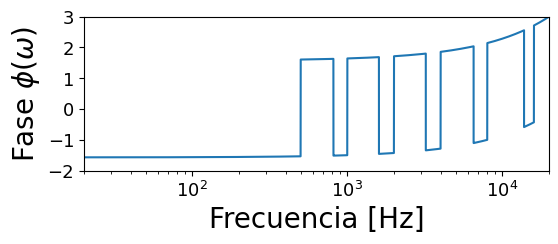

In [6]:
plt.figure(figsize=(6, 2))
plt.xlim(20,20e3)
plt.ylim(-2,3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Frecuencia [Hz]',fontsize=20)
plt.ylabel('Fase $\phi(\omega)$',fontsize=20)
plt.semilogx(frequencies, np.angle(fft_result))
plt.show()

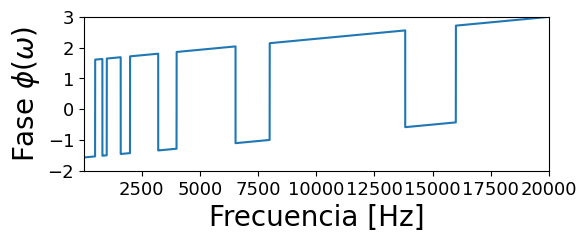

In [5]:
plt.figure(figsize=(6, 2))
plt.xlim(20,20e3)
plt.ylim(-2,3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Frecuencia [Hz]',fontsize=20)
plt.ylabel('Fase $\phi(\omega)$',fontsize=20)
plt.plot(frequencies, np.angle(fft_result))
plt.show()

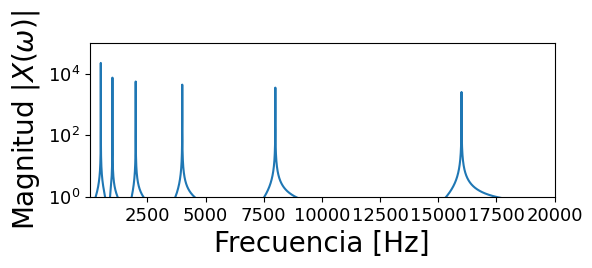

In [6]:
plt.figure(figsize=(6, 2))
plt.xlim(20,20e3)
plt.ylim(1,1e5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.semilogy(frequencies, np.abs(fft_result))
plt.xlabel('Frecuencia [Hz]',fontsize=20)
plt.ylabel('Magnitud $|X(\omega)|$',fontsize=20)
plt.show()

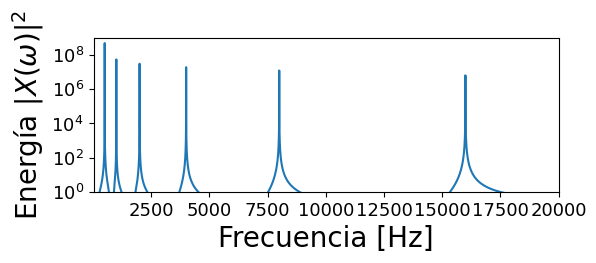

In [7]:
plt.figure(figsize=(6, 2))
plt.xlim(20,20e3)
plt.ylim(1,1e9)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.semilogy(frequencies, (np.abs(fft_result))**2)
plt.xlabel('Frecuencia [Hz]',fontsize=20)
plt.ylabel('Energía $|X(\omega)|^2$',fontsize=20)
plt.show()

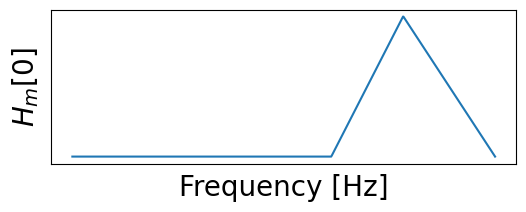

In [8]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

n_fft = 2048  
n_mels = 13   
sample_rate = 22050  

mel_filterbank = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=n_mels)
mel_frequencies = librosa.mel_frequencies(n_mels=n_mels, fmin=0.0, fmax=sample_rate / 2, htk=False)
plt.figure(figsize=(6, 2))

plt.xticks([])
plt.yticks([])
plt.xlabel('Frequency [Hz]',fontsize=20)
plt.ylabel('$H_m [0]$',fontsize=20)

plt.plot(mel_filterbank[12])
plt.show()

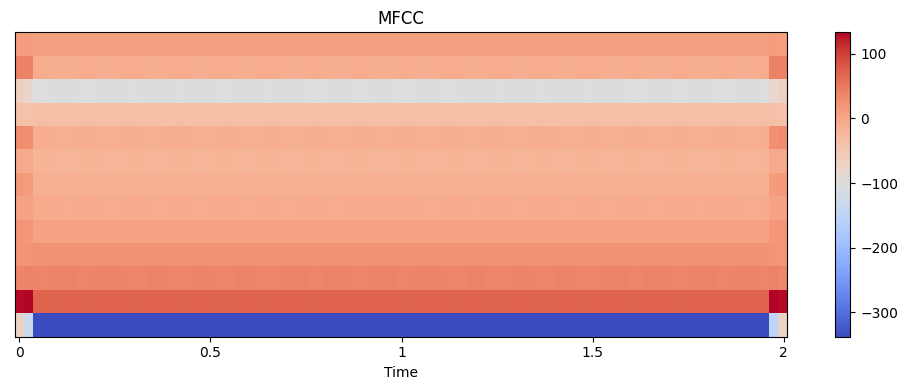

In [10]:
sr=22050
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)  # You can change n_mfcc to your desired number of coefficients
mfccs.shape
# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()